In [3]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')
#Load Iris.csv into a pandas dataFrame.
column_names = ['Age','Operational_Year','Axil_Nodes','Surv_Status']
habermann = pd.read_csv("/workspaces/python-/haberman.csv",header = None ,names = column_names)

In [4]:
habermann.head()

,Age,Operational_Year,Axil_Nodes,Surv_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
habermann.tail()

,Age,Operational_Year,Axil_Nodes,Surv_Status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


Some high level statistics

In [6]:
print(habermann.shape)

(306, 4)


In [7]:
habermann.columns

Index(['Age', 'Operational_Year', 'Axil_Nodes', 'Surv_Status'], dtype='object')

In [8]:
habermann["Surv_Status"].value_counts()

1    225
2     81
Name: Surv_Status, dtype: int64

Univariate Analysis
PDF

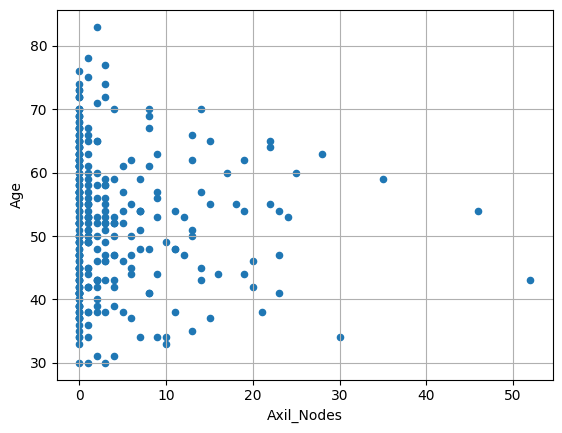

In [12]:
#2-D scatter plot:
# always  understand  the axis: labels and scale.
habermann.plot(kind='scatter', x='Axil_Nodes', y='Age') 
plt.grid()
plt.show()

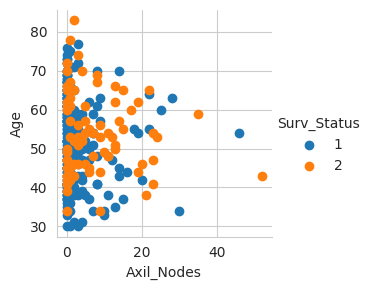

In [22]:
sns.set_style('whitegrid')
sns.FacetGrid(habermann, hue="Surv_Status").map(plt.scatter, "Axil_Nodes", "Age").add_legend();
plt.show();

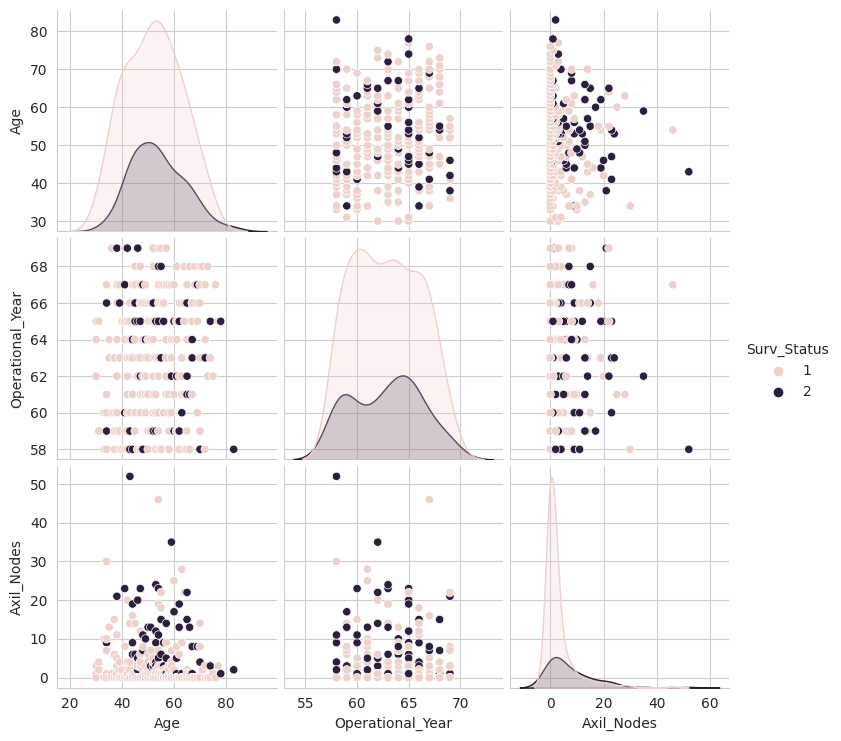

In [26]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(habermann, hue="Surv_Status", vars=['Age','Operational_Year', 'Axil_Nodes'])
plt.show()

1D-Scatter Plots

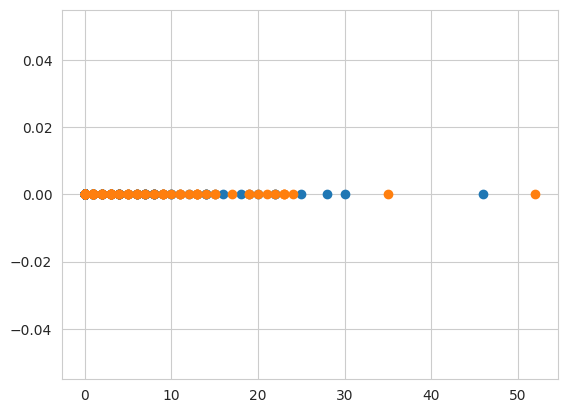

In [28]:
import numpy as np
haberman_Long_Survive = habermann.loc[habermann["Surv_Status"] == 1];
haberman_Short_Survive = habermann.loc[habermann["Surv_Status"] == 2];
plt.plot(haberman_Long_Survive["Axil_Nodes"], np.zeros_like(haberman_Long_Survive['Axil_Nodes']), 'o')
plt.plot(haberman_Short_Survive["Axil_Nodes"], np.zeros_like(haberman_Short_Survive['Axil_Nodes']), 'o')
plt.show()

PDF of Age

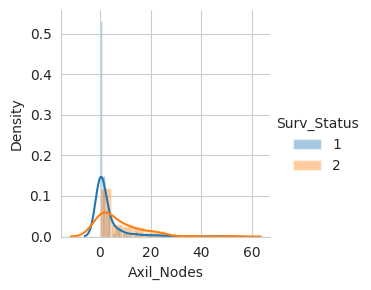

In [30]:
sns.FacetGrid(habermann,hue="Surv_Status")\
.map(sns.distplot,"Axil_Nodes")\
.add_legend()

PDF of Operation year

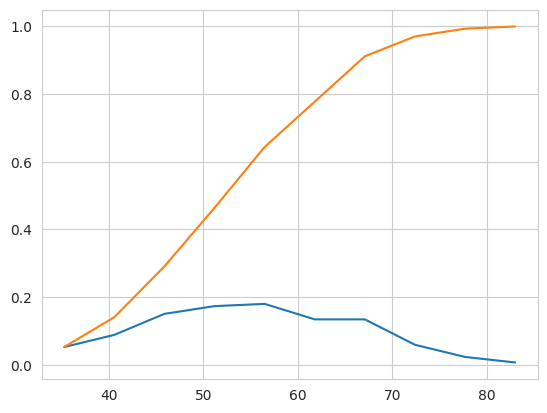

In [31]:
#PDF and CDF for age feature
counts, bin_edges = np.histogram(habermann['Age'], bins=10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

<Axes: xlabel='Surv_Status', ylabel='Axil_Nodes'>

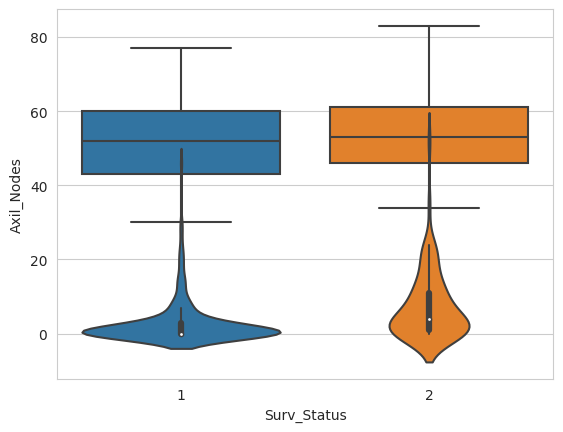

In [33]:
#Box plot and Violin plot
sns.boxplot(x='Surv_Status', y='Age', data=habermann)
sns.violinplot(x='Surv_Status', y='Axil_Nodes', data=habermann)



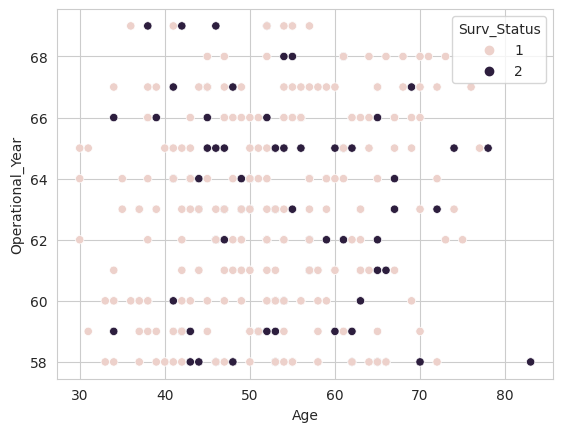

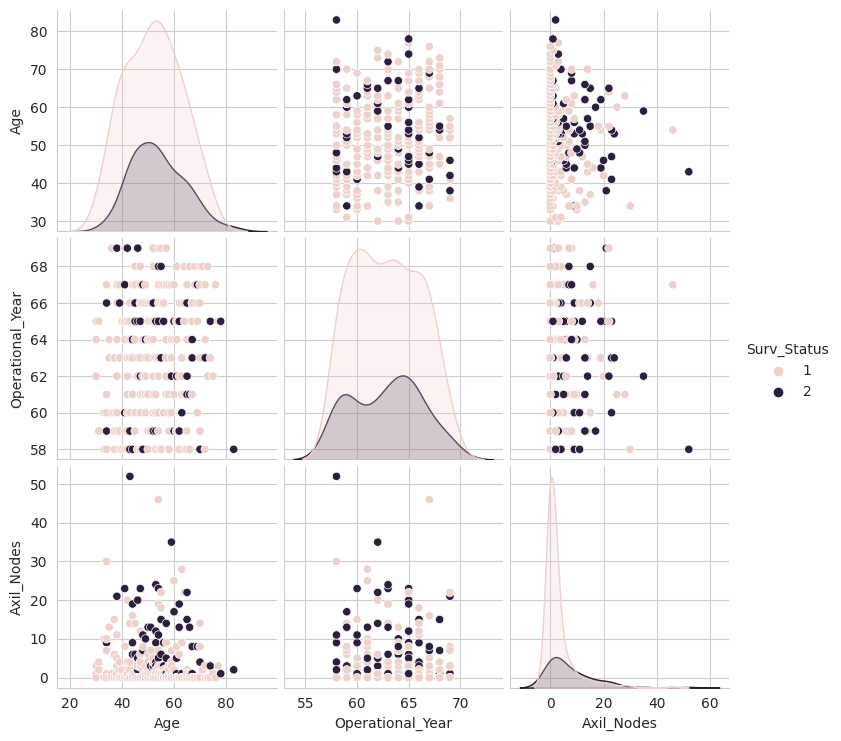

In [34]:
#Bivariate Analysis
sns.scatterplot(x='Age', y='Operational_Year', hue='Surv_Status', data=habermann)
sns.pairplot(data=habermann, hue='Surv_Status', vars=['Age', 'Operational_Year', 'Axil_Nodes'])

plt.show()